In [9]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv('mf_df_mapped_smoted.csv')
target = 'DC201'
df.head()

,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,...,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a,DC201
0,0,1,1,1,0,1,0,0,0,0,...,0,0,0,0,0,2,0,1,60,1
1,0,1,4,1,0,1,0,0,1,0,...,0,0,0,1,1,1,1,3,70,1
2,0,1,0,1,0,1,1,1,1,0,...,0,0,0,1,1,0,3,0,75,1
3,0,1,0,1,0,0,0,0,1,0,...,0,1,0,1,0,1,0,0,85,1
4,0,1,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,1,0,65,1


In [11]:
RANDOM_SEED = 42

In [12]:
from sklearn.model_selection import train_test_split

y = np.array(df[target])
df_dropped = df.drop(target, axis=1) # drop target
X = np.array(df_dropped)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=RANDOM_SEED)

In [13]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=RANDOM_SEED)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.042 seconds


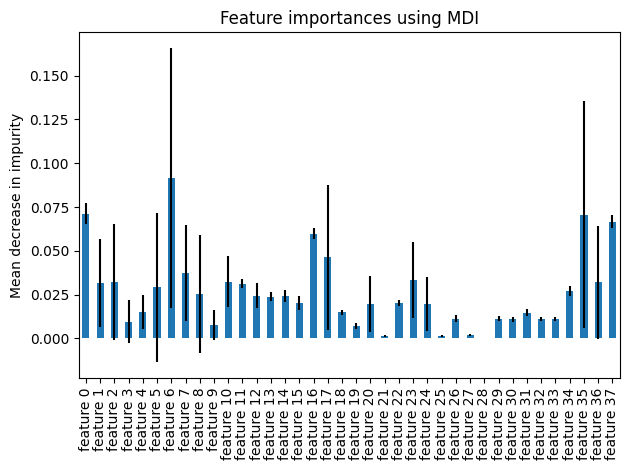

In [15]:
import matplotlib.pyplot as plt

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()